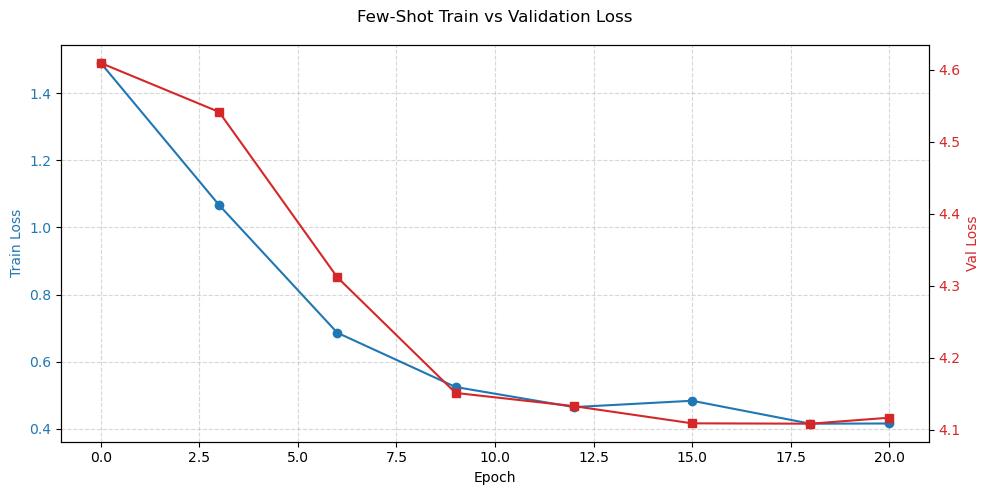

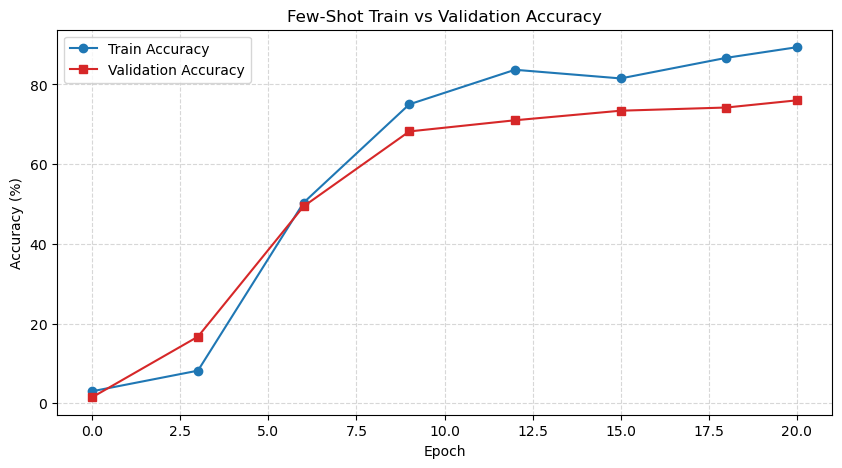

In [1]:
import matplotlib.pyplot as plt

# Epochs for few-shot
epochs = [0, 3, 6, 9, 12, 15, 18, 20]

# Train and validation loss
train_loss = [1.4893, 1.0665, 0.6862, 0.5247, 0.4649, 0.4838, 0.4155, 0.4161]
val_loss   = [4.6093, 4.5414, 4.3118, 4.1513, 4.1330, 4.1091, 4.1086, 4.1169]

# Train and validation accuracy
train_acc = [3.0, 8.17, 50.33, 75.0, 83.67, 81.5, 86.67, 89.33]  # in %
val_acc   = [1.5, 16.7, 49.4, 68.2, 71.0, 73.4, 74.2, 76.0]      # in %

# ------------------- Plot Loss -------------------
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color=color)
ax1.plot(epochs, train_loss, marker='o', color=color, label='Train Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Val Loss', color=color)
ax2.plot(epochs, val_loss, marker='s', color=color, label='Val Loss')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Few-Shot Train vs Validation Loss')
fig.tight_layout()
plt.show()

# ------------------- Plot Accuracy (same axis) -------------------
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc, marker='o', color='tab:blue', label='Train Accuracy')
plt.plot(epochs, val_acc, marker='s', color='tab:red', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Few-Shot Train vs Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


Error: 'cm.txt' file not found. Please ensure it's in the same directory.
✅ Visualization complete! The 20x20 subset heatmap has been saved to 'confusion_matrix_subset_20x20.png'.


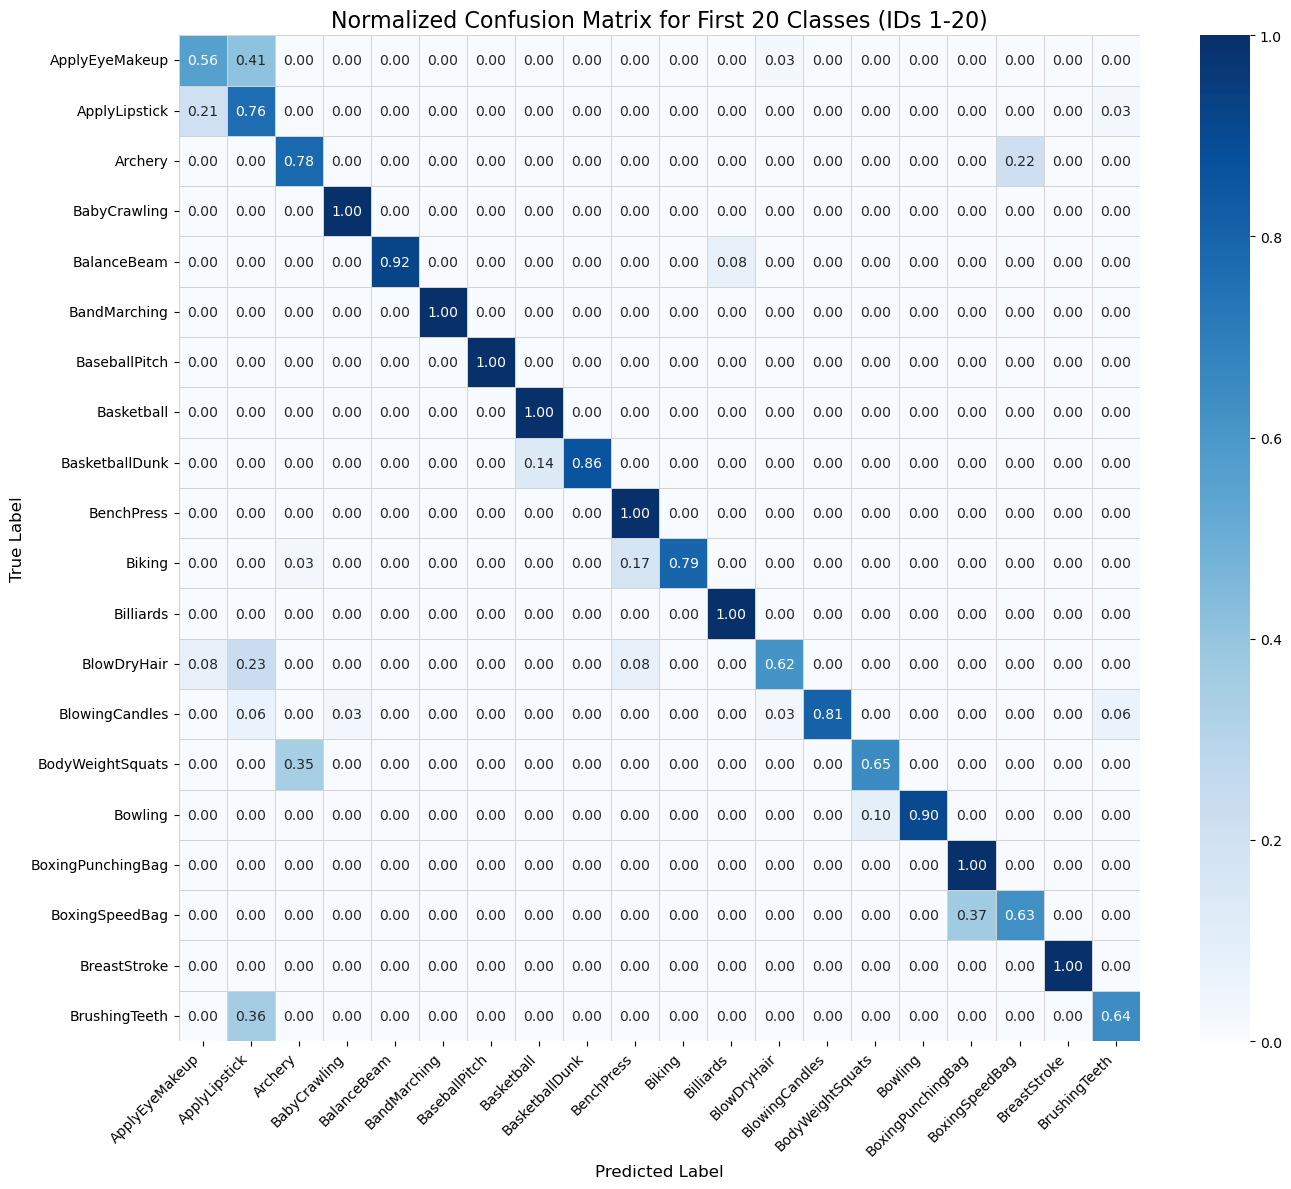

: 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Class Labels (101 classes total) ---
FULL_CLASS_LABELS = [
    'ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam',
    'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress',
    'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats',
    'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke', 'BrushingTeeth',
    'CleanAndJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen',
    'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics',
    'FrisbeeCatch', 'FrontCrawl', 'GolfSwing', 'Haircut', 'Hammering',
    'HammerThrow', 'HandstandPushups', 'HandstandWalking', 'HeadMassage', 'HighJump',
    'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow',
    'JugglingBalls', 'JumpingJack', 'JumpRope', 'Kayaking', 'Knitting',
    'LongJump', 'Lunges', 'MilitaryParade', 'Mixing', 'MoppingFloor',
    'Nunchucks', 'ParallelBars', 'PizzaTossing', 'PlayingCello', 'PlayingDaf',
    'PlayingDhol', 'PlayingFlute', 'PlayingGuitar', 'PlayingPiano', 'PlayingSitar',
    'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse', 'PullUps',
    'Punch', 'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing',
    'Rowing', 'SalsaSpin', 'ShavingBeard', 'Shotput', 'SkateBoarding',
    'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty',
    'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot',
    'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'Typing',
    'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog', 'WallPushups', 'WritingOnBoard'
]
# We only want the first 20 labels for the subset visualization (IDs 0 to 19)
SUBSET_SIZE = 20
SUBSET_LABELS = FULL_CLASS_LABELS[:SUBSET_SIZE]

# --- 2. Load and Extract Subset Data ---
try:
    # Load the full 101x101 confusion matrix
    full_cm = np.loadtxt('output/ucf101_test/cm.txt', dtype=np.int32)
except FileNotFoundError:
    print("Error: 'cm.txt' file not found. Please ensure it's in the same directory.")
    exit()
except ValueError:
    print("Error: Data in 'cm.txt' could not be read as a matrix of integers.")
    exit()

# Extract the top-left 20x20 sub-matrix
subset_cm = full_cm[:SUBSET_SIZE, :SUBSET_SIZE]

# --- 3. Normalization ---
# Normalize the subset matrix row-wise (by True Label)
subset_cm_normalized = subset_cm.astype('float') / subset_cm.sum(axis=1)[:, np.newaxis]

# --- 4. Visualization ---

# Set a reasonable figure size for 20x20
plt.figure(figsize=(14, 12))

# Create the heatmap
sns.heatmap(
    subset_cm_normalized,
    annot=True, # Set to True to show normalized values
    fmt='.2f', # Format annotation to two decimal places
    cmap='Blues',
    cbar=True,
    xticklabels=SUBSET_LABELS,
    yticklabels=SUBSET_LABELS,
    linewidths=.5,
    linecolor='lightgray'
)

# Label axes and title
plt.title(f'Normalized Confusion Matrix for First {SUBSET_SIZE} Classes (IDs 1-20)', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Adjust label rotations and font size for clarity
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

# Save the plot
plt.savefig('confusion_matrix_subset_20x20.png')
print("✅ Visualization complete! The 20x20 subset heatmap has been saved to 'confusion_matrix_subset_20x20.png'.")

✅ Visualization complete! The best 20x20 subset heatmap has been saved to 'confusion_matrix_BEST_20x20.png'.


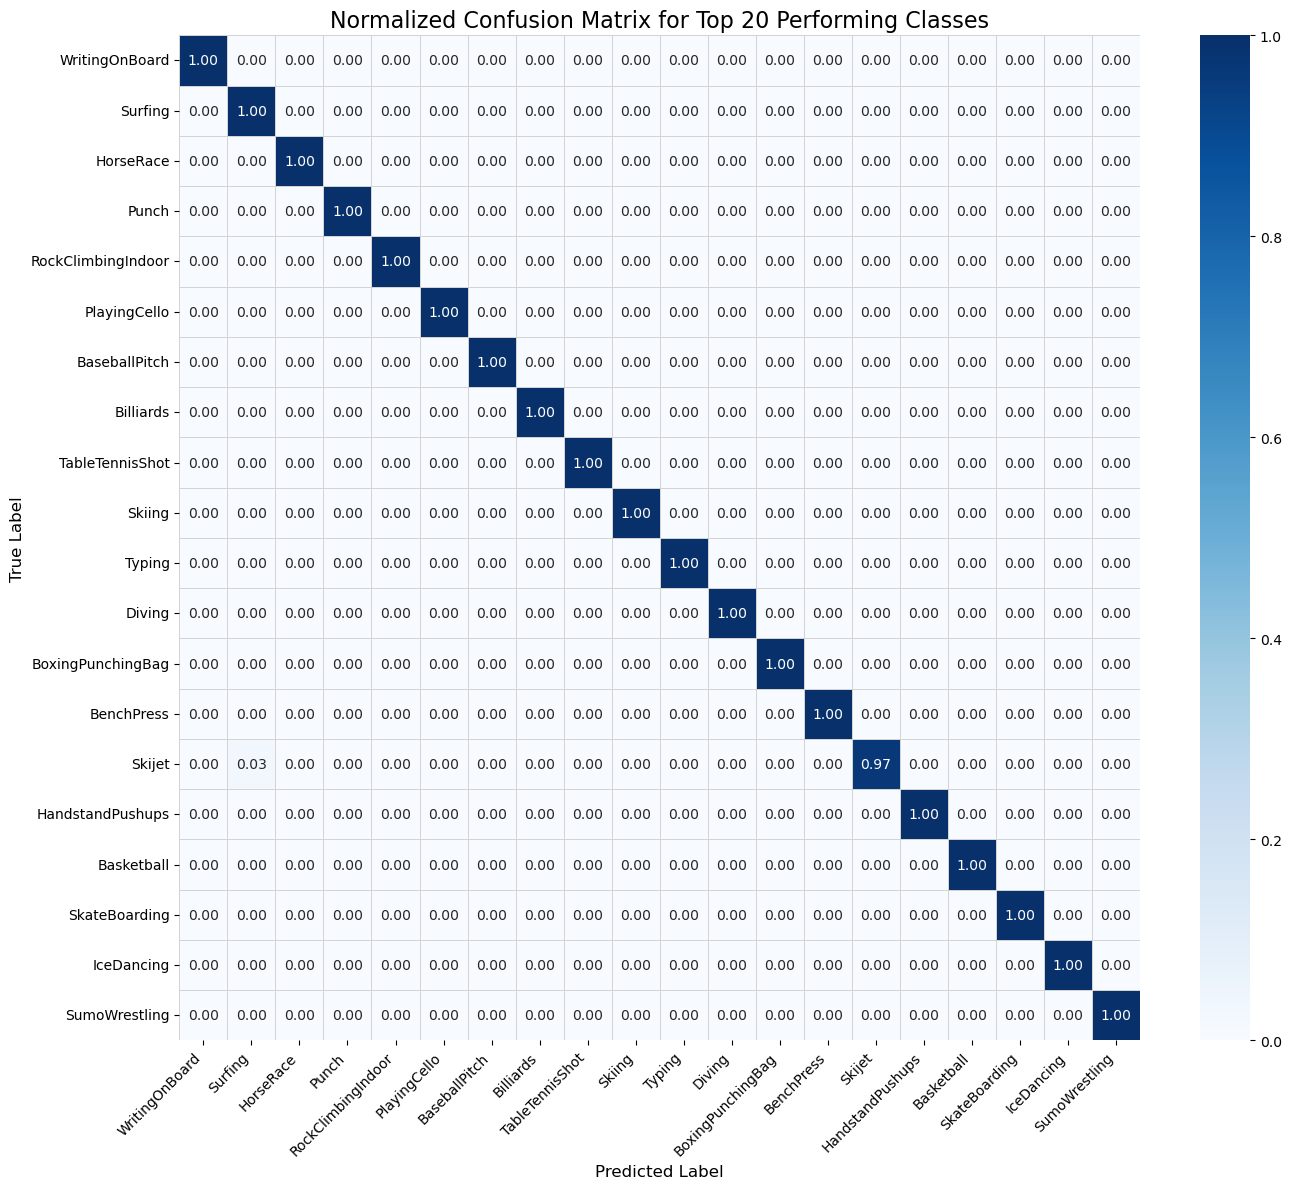

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Constants and Class Labels ---
SUBSET_SIZE = 20
FULL_CLASS_LABELS = [
    'ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam',
    'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress',
    'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats',
    'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke', 'BrushingTeeth',
    'CleanAndJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen',
    'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics',
    'FrisbeeCatch', 'FrontCrawl', 'GolfSwing', 'Haircut', 'Hammering',
    'HammerThrow', 'HandstandPushups', 'HandstandWalking', 'HeadMassage', 'HighJump',
    'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow',
    'JugglingBalls', 'JumpingJack', 'JumpRope', 'Kayaking', 'Knitting',
    'LongJump', 'Lunges', 'MilitaryParade', 'Mixing', 'MoppingFloor',
    'Nunchucks', 'ParallelBars', 'PizzaTossing', 'PlayingCello', 'PlayingDaf',
    'PlayingDhol', 'PlayingFlute', 'PlayingGuitar', 'PlayingPiano', 'PlayingSitar',
    'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse', 'PullUps',
    'Punch', 'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing',
    'Rowing', 'SalsaSpin', 'ShavingBeard', 'Shotput', 'SkateBoarding',
    'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty',
    'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot',
    'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'Typing',
    'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog', 'WallPushups', 'WritingOnBoard'
]

# --- 2. Load and Analyze Confusion Matrix ---
try:
    # Load the full 101x101 confusion matrix from the file
    full_cm = np.loadtxt('cm.txt', dtype=np.int32)
except Exception as e:
    print(f"Error loading 'cm.txt': {e}")
    exit()

# Calculate Recall for all classes to determine performance
true_positives = np.diag(full_cm)
true_samples = full_cm.sum(axis=1)

# Handle division by zero for classes with no samples, if any (set recall to 0)
recall = np.divide(true_positives, true_samples, out=np.zeros_like(true_positives, dtype=float), where=true_samples!=0)

# Get the indices (IDs) that correspond to the top 20 Recall scores
# argsort returns indices that would sort the array; [::-1] reverses it for descending order (best first)
# [:SUBSET_SIZE] selects the top 20 indices
best_indices = np.argsort(recall)[::-1][:SUBSET_SIZE]

# --- 3. Extract Subset Data ---
# Extract the names of the best-performing classes
best_class_labels = [FULL_CLASS_LABELS[i] for i in best_indices]

# Extract the 20x20 sub-matrix using the sorted best indices
# This creates a confusion matrix restricted to only the best 20 classes
best_cm_subset = full_cm[best_indices[:, None], best_indices]

# Normalize the subset matrix row-wise (by True Label)
best_cm_normalized = best_cm_subset.astype('float') / best_cm_subset.sum(axis=1)[:, np.newaxis]

# --- 4. Visualization ---
plt.figure(figsize=(14, 12))

sns.heatmap(
    best_cm_normalized,
    annot=True,              # Show normalized values
    fmt='.2f',               # Format to two decimal places
    cmap='Blues',
    cbar=True,
    xticklabels=best_class_labels,
    yticklabels=best_class_labels,
    linewidths=.5,
    linecolor='lightgray'
)

# Label axes and title
plt.title(f'Normalized Confusion Matrix for Top {SUBSET_SIZE} Performing Classes', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Adjust label rotations for clarity
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

# Save the plot
plt.savefig('confusion_matrix_BEST_20x20.png')
print("✅ Visualization complete! The best 20x20 subset heatmap has been saved to 'confusion_matrix_BEST_20x20.png'.")

✅ Visualization complete! The worst 20x20 subset heatmap has been saved to 'confusion_matrix_WORST_20x20.png'.


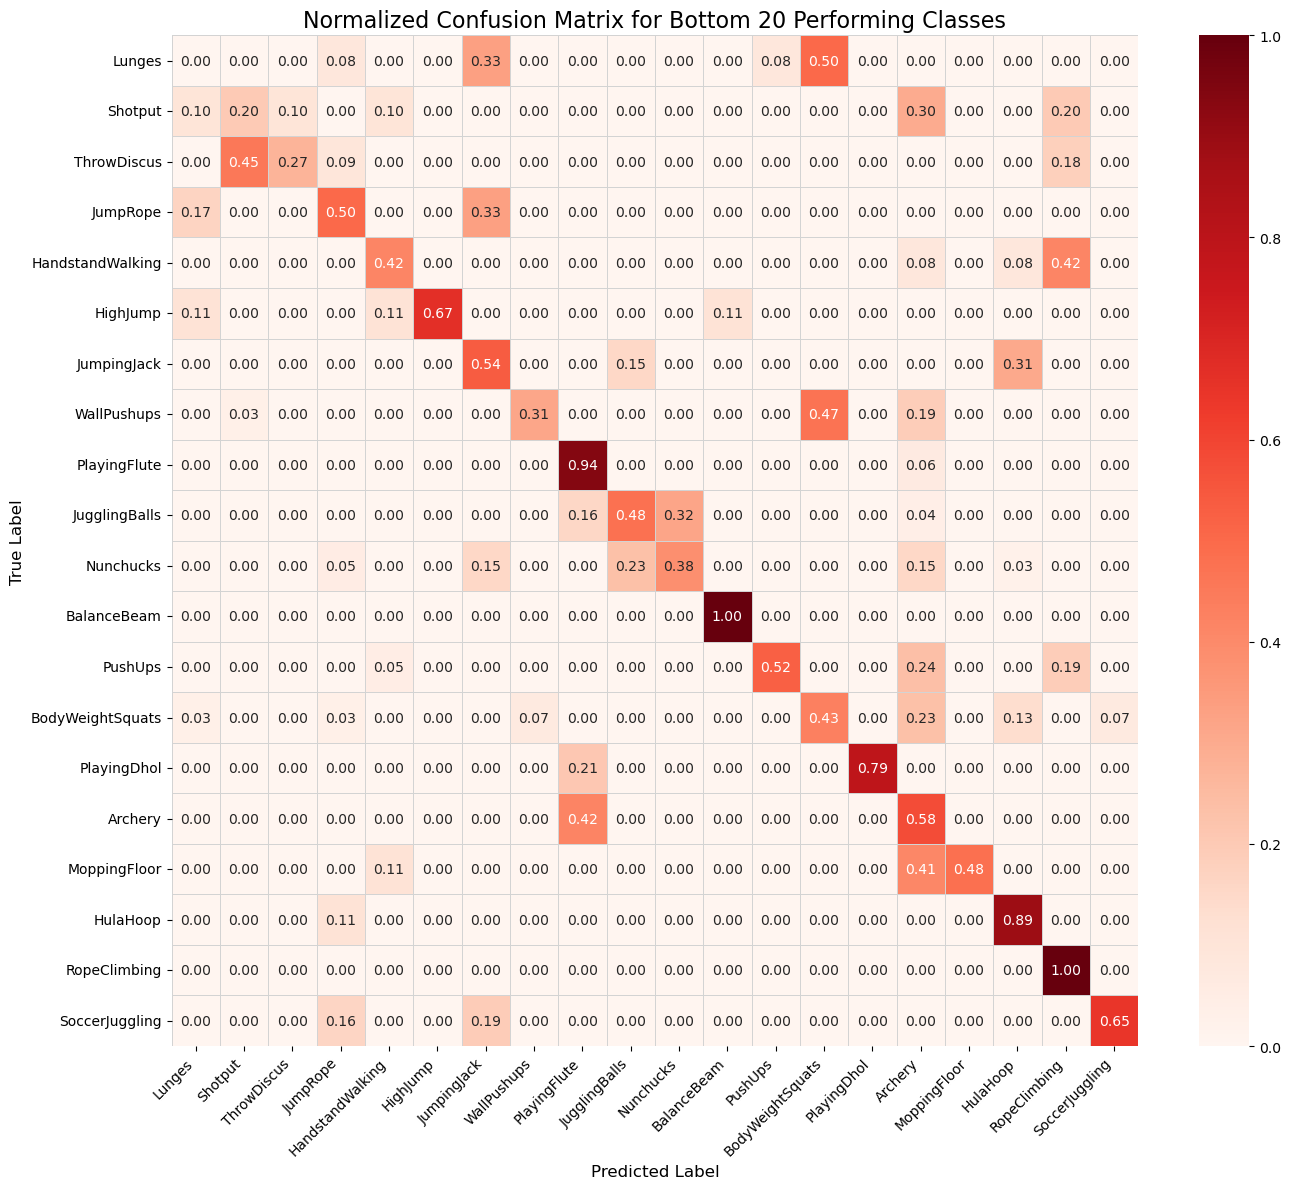

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Constants and Class Labels ---
SUBSET_SIZE = 20
FULL_CLASS_LABELS = [
    'ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam',
    'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress',
    'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats',
    'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke', 'BrushingTeeth',
    'CleanAndJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen',
    'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics',
    'FrisbeeCatch', 'FrontCrawl', 'GolfSwing', 'Haircut', 'Hammering',
    'HammerThrow', 'HandstandPushups', 'HandstandWalking', 'HeadMassage', 'HighJump',
    'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow',
    'JugglingBalls', 'JumpingJack', 'JumpRope', 'Kayaking', 'Knitting',
    'LongJump', 'Lunges', 'MilitaryParade', 'Mixing', 'MoppingFloor',
    'Nunchucks', 'ParallelBars', 'PizzaTossing', 'PlayingCello', 'PlayingDaf',
    'PlayingDhol', 'PlayingFlute', 'PlayingGuitar', 'PlayingPiano', 'PlayingSitar',
    'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse', 'PullUps',
    'Punch', 'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing',
    'Rowing', 'SalsaSpin', 'ShavingBeard', 'Shotput', 'SkateBoarding',
    'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty',
    'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot',
    'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'Typing',
    'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog', 'WallPushups', 'WritingOnBoard'
]

# --- 2. Load and Analyze Confusion Matrix ---
try:
    # Load the full 101x101 confusion matrix from the file
    full_cm = np.loadtxt('cm.txt', dtype=np.int32)
except Exception as e:
    print(f"Error loading 'cm.txt': {e}")
    exit()

# Calculate Recall for all classes to determine performance
true_positives = np.diag(full_cm)
true_samples = full_cm.sum(axis=1)

# Handle division by zero for classes with no samples
recall = np.divide(true_positives, true_samples, out=np.zeros_like(true_positives, dtype=float), where=true_samples!=0)

# Get the indices (IDs) that correspond to the lowest 20 Recall scores
# argsort returns indices in ascending order (worst first)
# [:SUBSET_SIZE] selects the first 20 indices (the worst-performing)
worst_indices = np.argsort(recall)[:SUBSET_SIZE]

# --- 3. Extract Subset Data ---
# Extract the names of the worst-performing classes
worst_class_labels = [FULL_CLASS_LABELS[i] for i in worst_indices]

# Extract the 20x20 sub-matrix using the sorted worst indices
# This creates a confusion matrix restricted to only the worst 20 classes
worst_cm_subset = full_cm[worst_indices[:, None], worst_indices]

# Normalize the subset matrix row-wise (by True Label)
worst_cm_normalized = worst_cm_subset.astype('float') / worst_cm_subset.sum(axis=1)[:, np.newaxis]

# --- 4. Visualization ---
plt.figure(figsize=(14, 12))

sns.heatmap(
    worst_cm_normalized,
    annot=True,              # Show normalized values
    fmt='.2f',               # Format to two decimal places
    cmap='Reds',             # Using Red color map to highlight poor performance
    cbar=True,
    xticklabels=worst_class_labels,
    yticklabels=worst_class_labels,
    linewidths=.5,
    linecolor='lightgray'
)

# Label axes and title
plt.title(f'Normalized Confusion Matrix for Bottom {SUBSET_SIZE} Performing Classes', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Adjust label rotations for clarity
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

# Save the plot
plt.savefig('confusion_matrix_WORST_20x20.png')
print("✅ Visualization complete! The worst 20x20 subset heatmap has been saved to 'confusion_matrix_WORST_20x20.png'.")